Nama : Fahrul Firmansyah
Grup : M02

<a href='https://www.kaggle.com/datasets/cpluzshrijayan/milkquality' >klik </a> untuk melihat dataset

Meload dataset menggunakan perintah wget

In [1]:
!wget --no-check-certificate \
 https://github.com/aldebarankwsuperrr/dataset/blob/main/milknew.csv?raw=true \
  -O /content/milknew.csv

--2022-09-18 02:57:10--  https://github.com/aldebarankwsuperrr/dataset/blob/main/milknew.csv?raw=true
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/aldebarankwsuperrr/dataset/raw/main/milknew.csv [following]
--2022-09-18 02:57:11--  https://github.com/aldebarankwsuperrr/dataset/raw/main/milknew.csv
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/aldebarankwsuperrr/dataset/main/milknew.csv [following]
--2022-09-18 02:57:11--  https://raw.githubusercontent.com/aldebarankwsuperrr/dataset/main/milknew.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent,

mengubah dataset kedalam pandas dataframe

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('milknew.csv')

In [3]:
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


melihat informasi rinci pada dataset untuk melihat fitur-fitur dan label pada dataset

In [4]:
df.info()
amount_of_data = len(df)
print("\nBanyak Data : ", amount_of_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB

Banyak Data :  1059


Pemeriksaan missing value

In [5]:
df.isnull().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

In [6]:
df.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


Melihat Persebaran data terhadap label pada dataset untuk memutuskan apakah dataset dapat digunakan atau tidak.



        jumlah sampel  persentase
low               429        40.5
medium            374        35.3
high              256        24.2


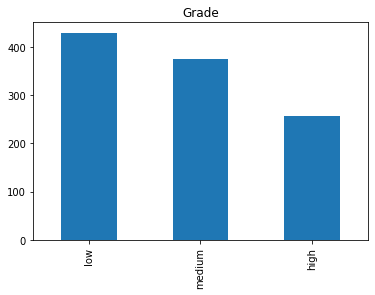

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

feature = 'Grade'
count = df.Grade.value_counts()
percent = 100*df[feature].value_counts(normalize=True)
data= pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(data)
count.plot(kind='bar', title=feature);

Memeriksa hubungan univariate pada fitur-fitur numerik pada dataset.

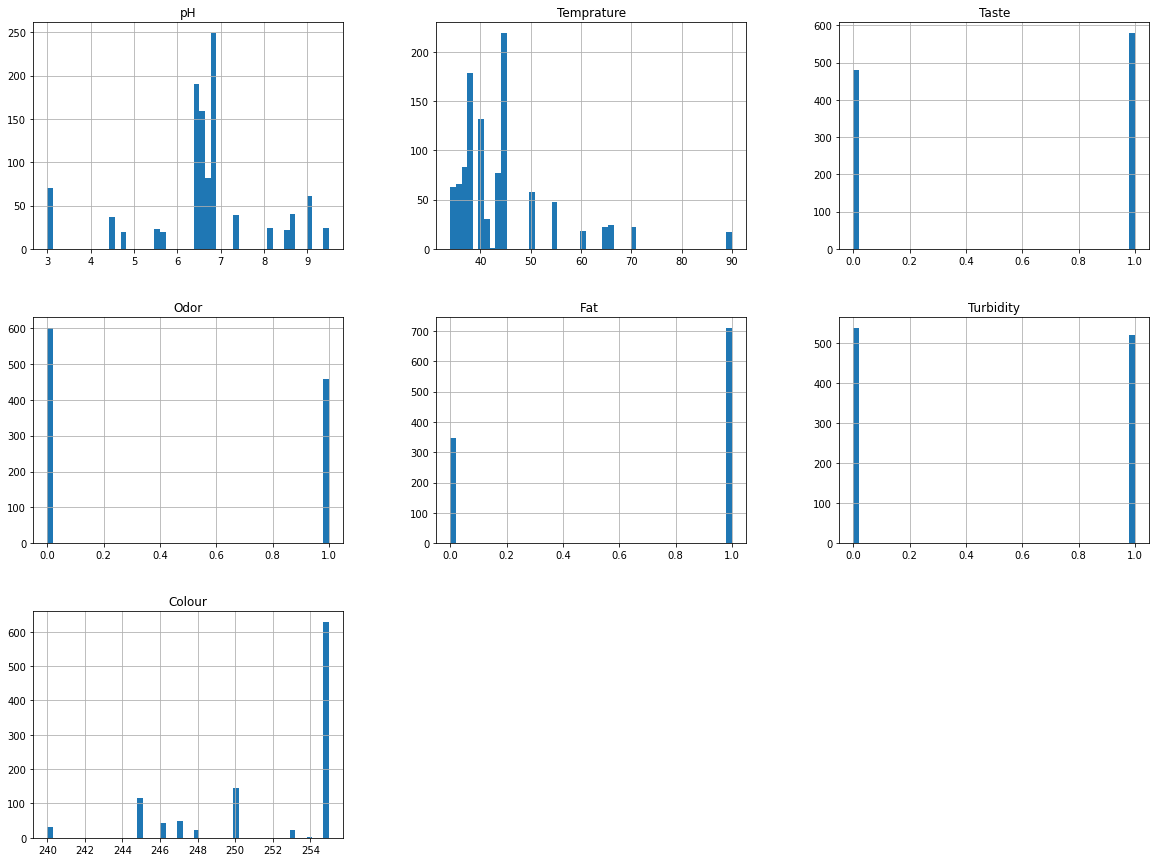

In [8]:
df.hist(bins=50, figsize=(20,15))
plt.show()

dari gambar tersebut dapat ditarik beberapa hal:
- Pada fitur pH, dapat dilihat bahwa bebrapa data terpusat pada antara pH 6 hingga pH 7.
- Pada fitur pH, terdapat  sebagian kecil data memiliki nilai diatas 9. Hal ini dapat kita indikasikan sebagai outliers.
- Pada fitur Temprature, banyak data memiliki temprature dibawah 50, dan terdapat beberapa data memiliki terletak jauh dari data lain yaitu dengan nilai temprature 90, hal itu dapat kita indikasikan sebagai outliers.
- Fitur selanjutnya yang dapat diamati adalah fitur Colour, pada fitur colour data memiliki nilai yang variatif, namun dapat diamati bahwa terdapat sebuah data berada pada nilai colour 240, hal itu dapat diindikasikan sebagai outliers.



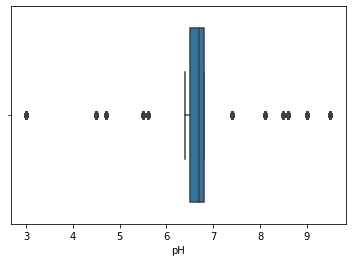

In [9]:
sns.boxplot(x=df['pH'])

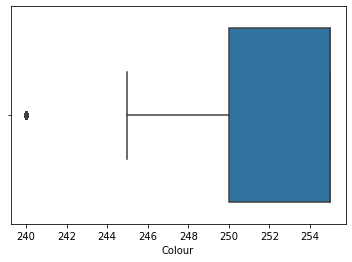

In [10]:
sns.boxplot(x=df['Colour'])

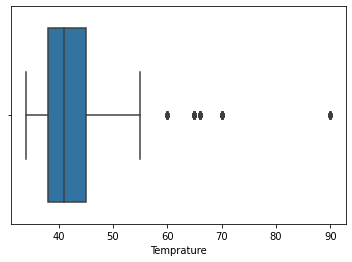

In [11]:
sns.boxplot(x=df['Temprature'])

In [12]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR=Q3-Q1
df=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
 
# Cek ukuran dataset setelah kita drop outliers
df.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  after removing the cwd from sys.path.


(648, 8)

Selanjutnya memeriksa hubungan multivariate 

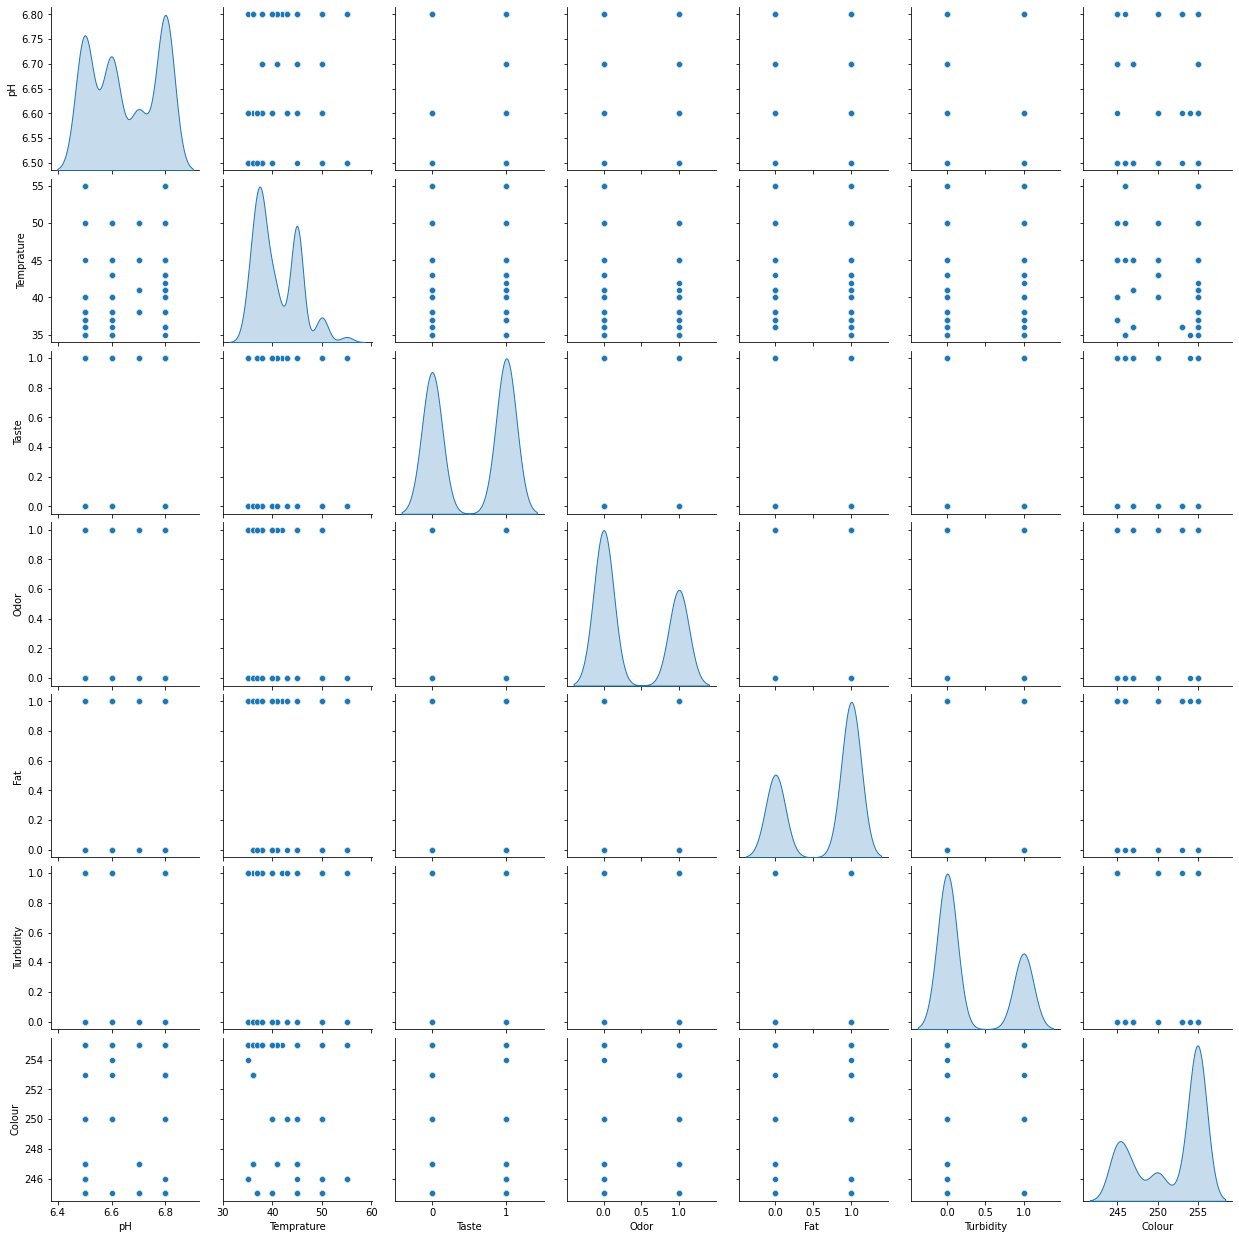

In [13]:
sns.pairplot(df, diag_kind = 'kde')

Histogram-histogream diatas menggambarkan data yang tidak beraturan, sehingga antar fitur tidak memiliki korelasi kuat

#Data Preparation

In [14]:
features = df.select_dtypes(include=np.number).columns.to_list()

print(features)

['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour']


Melakukan encoding terhadap label

In [15]:
df['Grade'].replace(['high', 'medium', 'low'], [3,2,1], inplace=True)

Melakukan pembagian data untuk data training dan data test

In [16]:
from sklearn.model_selection import train_test_split

y = df['Grade']
x = df.drop(['Grade'],axis=1)

x_train, x_test, y_train, y_test = train_test_split (x, y, test_size=0.3, random_state = 123)


Karena terdapat beberapa fitur memiliki nilai yang variatif, maka akan dilakukan standarisasi agar nilai tidak memiliki range yang besar sehingga model lebih mudah mempelajari dataset.

In [17]:
from sklearn.preprocessing import StandardScaler

scaler_feature = ['pH', 'Temprature','Colour']
scaler = StandardScaler().fit(x_train[scaler_feature])
x_train[scaler_feature] = scaler.transform(x_train.loc[:, scaler_feature])
x_train[scaler_feature].head()

,pH,Temprature,Colour
386,1.180306,1.000284,0.734866
425,-0.425335,-1.319883,0.734866
409,1.180306,-0.159800,0.734866
1047,1.180306,1.000284,-1.709291
95,-1.228156,-0.855849,0.734866


#Model Development
model yang akan diuji yaitu KNN, Random Forest, dan AdaBoost.
untuk mendapatkan parameter yang terbaik akan dilakukan hyperparameter tuning pada setiap model.

###Mencari parameter untuk model KNN

In [18]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['KNN', 'RandomForest', 'Boosting'])
 
knn = KNeighborsRegressor()
parameters = {
    'n_neighbors' : [5,10,15]
}

grid_search = GridSearchCV(knn, parameters)

grid_search.fit(x,y)
best_params_knn = grid_search.best_params_['n_neighbors']
print("best n_neighbors : ", best_params_knn)

best n_neighbors :  5


###Melatih KNN dengan parameter yang telah didapat

In [19]:
knn = KNeighborsRegressor(n_neighbors=best_params_knn)
knn.fit(x_train, y_train)
 
models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(x_train), y_true=y_train)

###Mencari parameter untuk model Random Forest

In [20]:
# Impor library yang dibutuhkan
from sklearn.ensemble import RandomForestRegressor
 
# buat model prediksi
RF = RandomForestRegressor()

parameters = {
    'n_estimators' : [5,10,15],
    'max_depth' : [10, 16, 20],
    'random_state' : [45, 55, 65],
    'n_jobs' : [1,2,3]
}

grid_search = GridSearchCV(RF, parameters)

grid_search.fit(x,y)
best_params_RF = grid_search.best_params_
print("best n_neighbors : ", best_params_RF)

best n_neighbors :  {'max_depth': 10, 'n_estimators': 5, 'n_jobs': 1, 'random_state': 55}


###Melatih Random Forest dengan parameter yang telah didapat

In [21]:
RF = RandomForestRegressor(n_estimators = best_params_RF['n_estimators'],
                           max_depth = best_params_RF['max_depth'],
                           random_state = best_params_RF['random_state'],
                           n_jobs = best_params_RF['n_jobs']
                           )
RF.fit(x_train, y_train)
 
models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(x_train), y_true=y_train)          

###Mencari parameter untuk model AdaBoost

In [22]:
from sklearn.ensemble import AdaBoostRegressor
 
boosting = AdaBoostRegressor()   

parameters = {
    'learning_rate' : [0.5,0.05,0.005],
    'random_state' : [5, 55, 555],
}

grid_search = GridSearchCV(boosting, parameters)

grid_search.fit(x,y)
best_params_boosting = grid_search.best_params_
print("best n_neighbors : ", best_params_boosting)

best n_neighbors :  {'learning_rate': 0.5, 'random_state': 555}


###Melatih AdaBoost dengan parameter yang telah didapat

In [23]:
boosting = AdaBoostRegressor(learning_rate=best_params_boosting['learning_rate'], random_state=best_params_boosting['random_state'])   

boosting.fit(x_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(x_train), y_true=y_train)

In [24]:
# Lakukan scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata=0 dan varians=1
x_test.loc[:, scaler_feature] = scaler.transform(x_test[scaler_feature])

In [25]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])
 
# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}
 
# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(x_train))/1e3 
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(x_test))/1e3
 
# Panggil mse
mse

,train,test
KNN,0.000008,0.000023
RF,0.000002,0.00003
Boosting,0.000059,0.00011


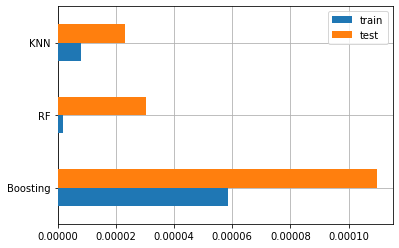

In [26]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [27]:
prediksi = x_test.iloc[:20].copy()
pred_dict = {'y_true':y_test[:20]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
 
pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
141,3,3.0,3.0,2.9
645,3,3.0,3.0,2.6
85,3,3.0,3.0,2.9
806,2,2.0,2.0,2.3
310,3,3.0,3.0,2.9
552,3,2.6,3.0,2.4
348,2,2.0,2.0,2.0
522,2,2.0,2.0,2.5
889,3,3.0,3.0,2.9
1024,3,3.0,3.0,2.6
